# Feature Engineering

## Libraries

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
import warnings
warnings.filterwarnings('ignore')

## Helper Functions

In [86]:
def plotBivarAnalysis(data,target,marker, alpha, w,h):
    _len=len(data.columns)
    plt.figure(figsize=(w,h))
    plt.title("Bivariate Analysis")
    i=1
    for col1 in data.columns:
        for col2 in data.columns:
            plt.subplot(_len,_len,i)
            plt.scatter(data[col2].values, data[col1].values,s=[marker]*data.shape[0], c=target, alpha=alpha)
            plt.ylabel(col1)
            plt.xlabel(col2)
            
            i=i+1
    plt.show()
    
    pcorrs=data.corr()
    plt.figure(figsize=(w-(w/4),h-(h/4)))
    plt.title("Corelation matrix")
    plt.imshow(pcorrs.values)
    plt.xticks((range(len(pcorrs.columns))), pcorrs.columns, rotation=90)
    plt.yticks((range(len(pcorrs.columns))), pcorrs.columns)
    for ind in range(len(pcorrs.columns)):
        for col in range(len(pcorrs.columns)):
            plt.text(col-0.1,ind+0.1,np.around(pcorrs.iloc[ind,col], decimals=2), fontdict={'size':15})
    plt.colorbar()
    plt.show()

In [252]:
def simpleClassfier(data,target,models=[]):
    X_train,X_test,y_train,y_test= train_test_split(data.values,target.values, random_state=42, test_size=0.25)
    
    for model in models:
        print("Using:\n",model)
        m=model
        m.fit(X_train,y_train)
        print("Test Score:",m.score(X_test,y_test),"\nTrain Score:", m.score(X_train,y_train))
    
    model=Sequential()

    model.add(Dense(14,input_shape=X_train.shape))
    model.add(Dense(64))
    
    model.add(Dense(1))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', )
    model.fit(X_train,y_train)
    

## Data Load

In [50]:
data=pd.read_csv("./Data/cleaned.csv")

In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [221]:
simpleClassfier(data.iloc[:,:6],data.iloc[:,6],[RandomForestClassifier(n_estimators=50),KNeighborsClassifier(n_neighbors=20) ])

Using:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Test Score: 0.7864583333333334 
Train Score: 0.9982638888888888
Using:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')
Test Score: 0.734375 
Train Score: 0.8072916666666666


## Exploratory Data Analysis

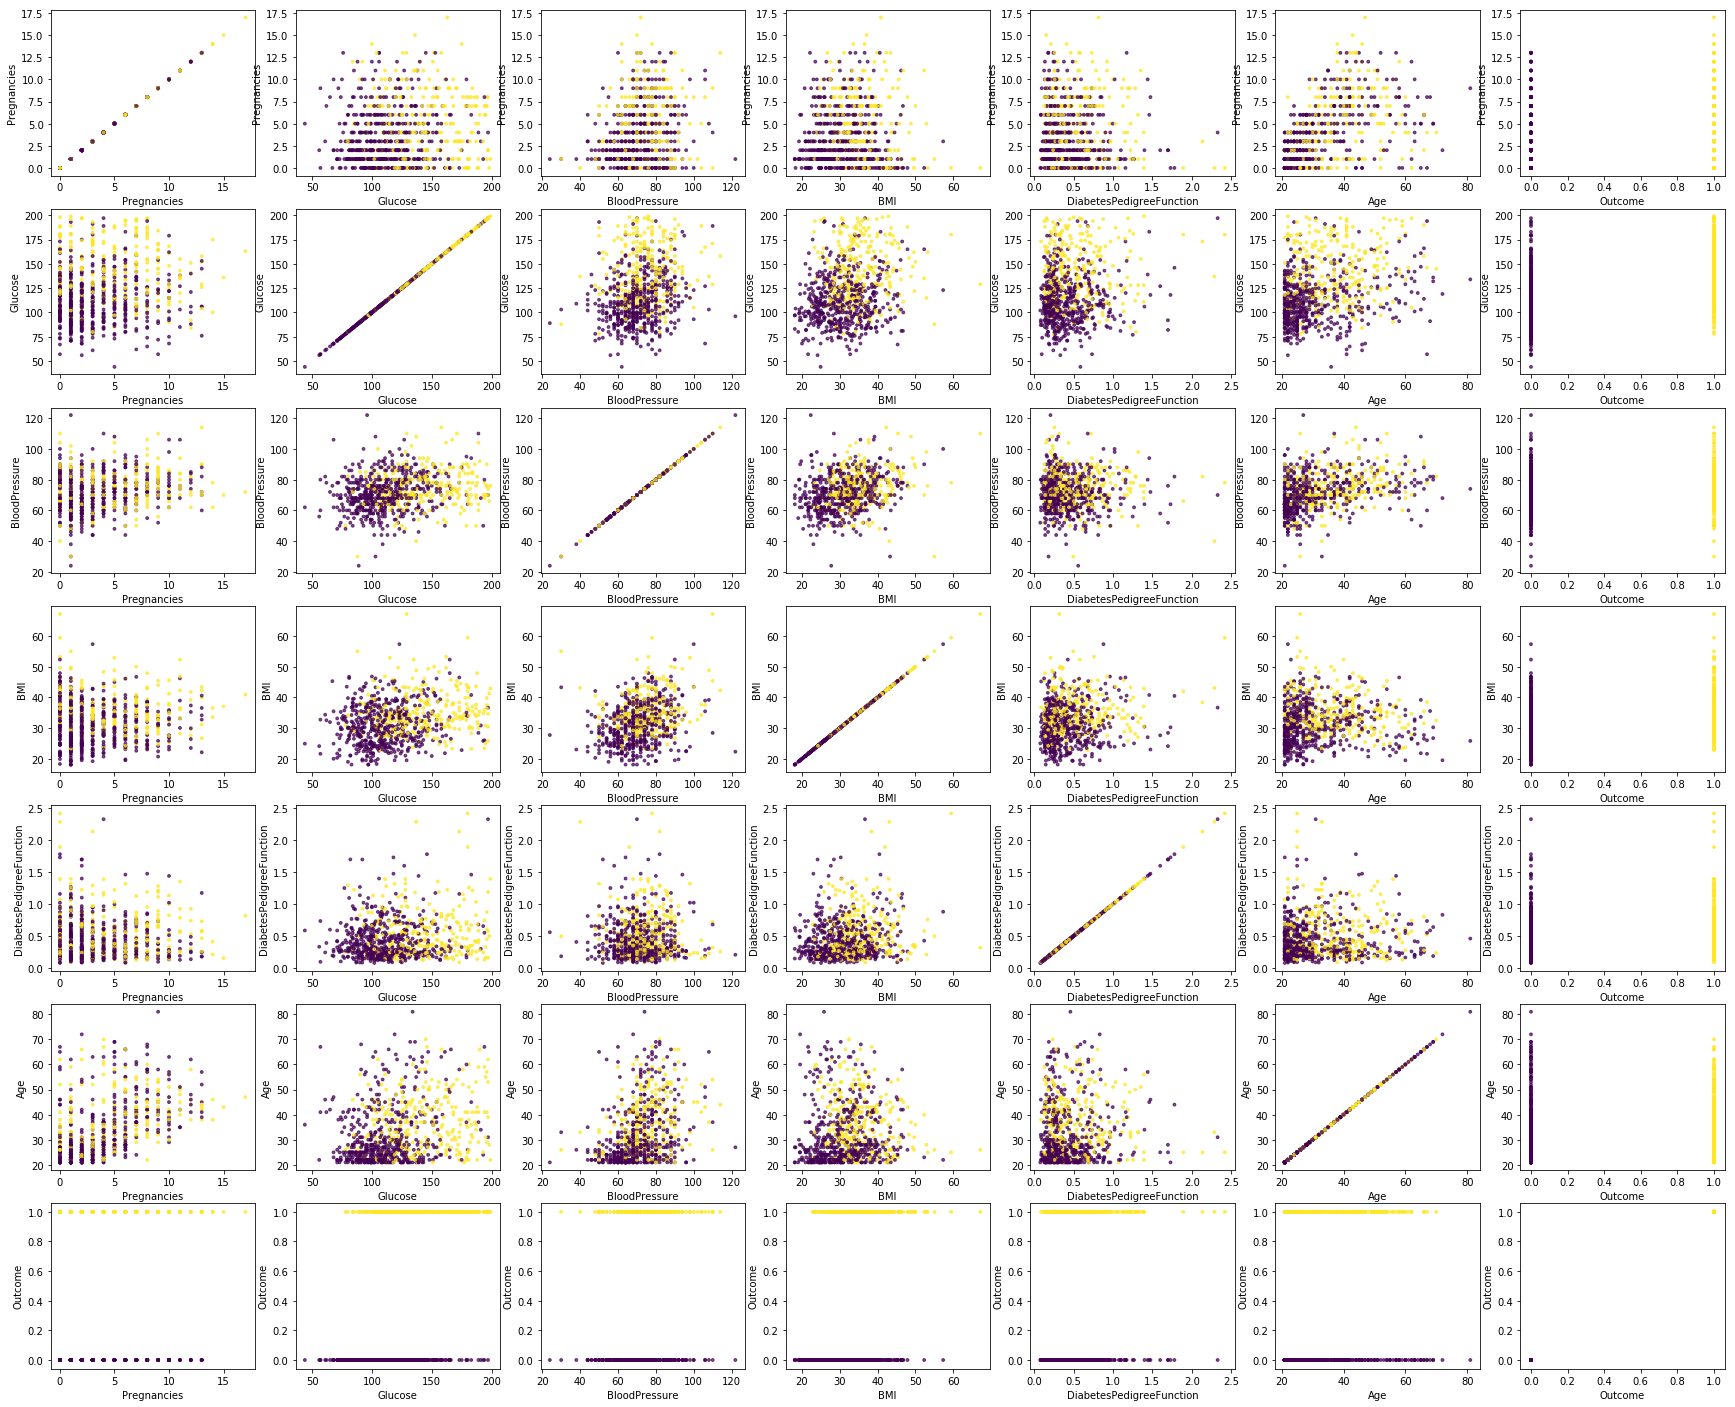

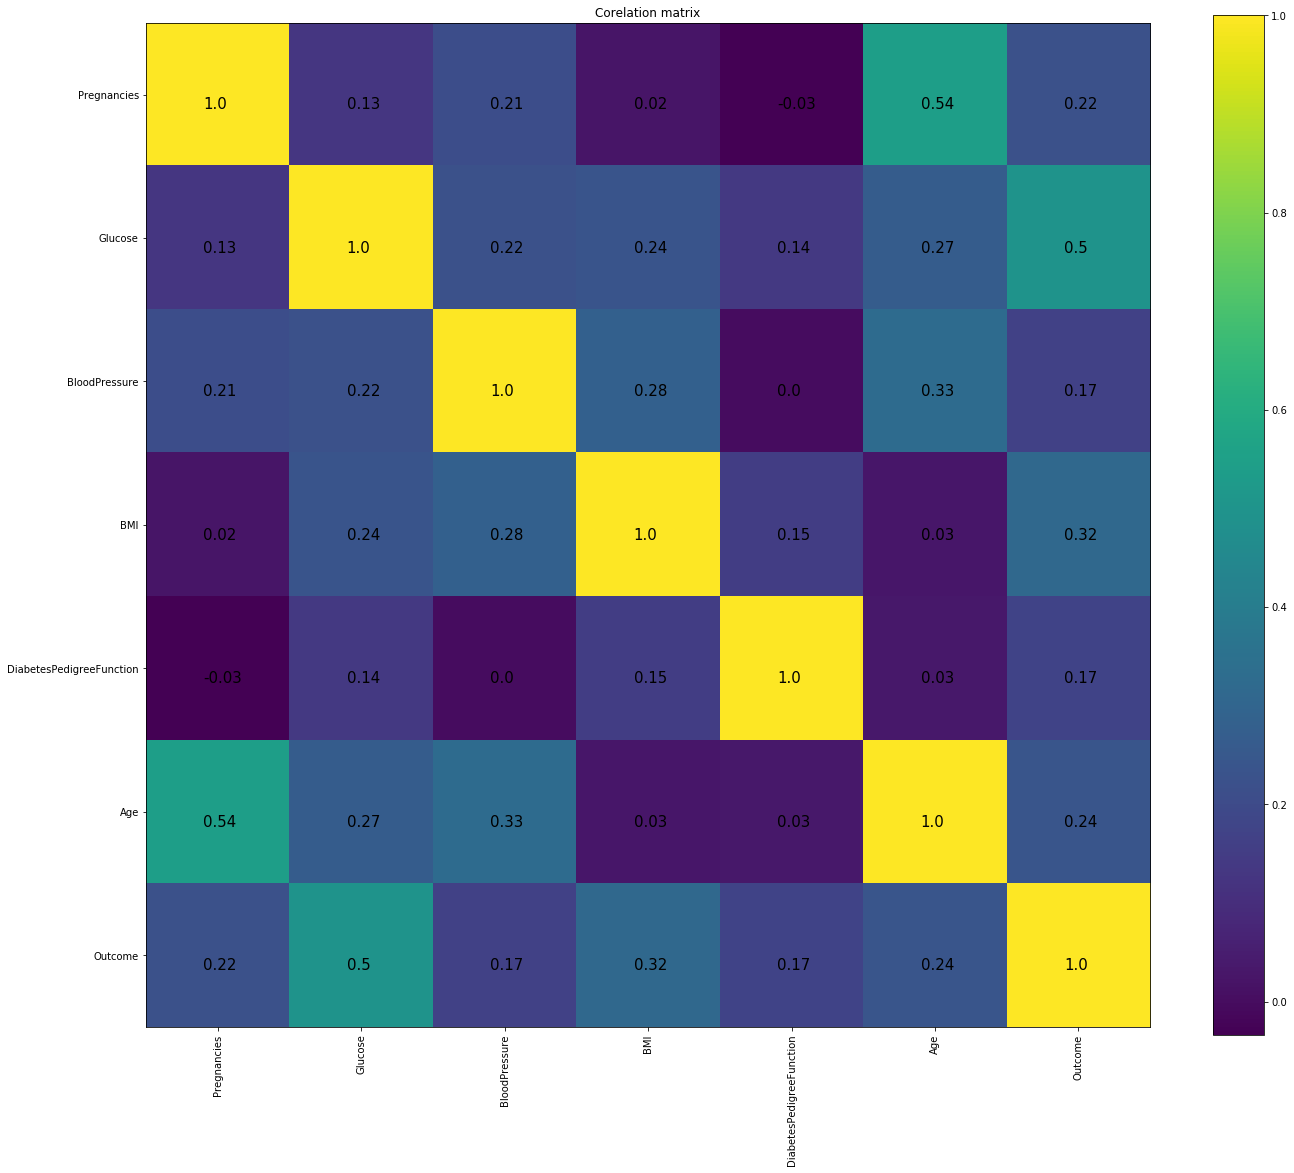

In [129]:
plotBivarAnalysis(data.iloc[:,:],data.iloc[:,6],8,0.7,30,25)

#### Glucose, Pregs, BMI, Age

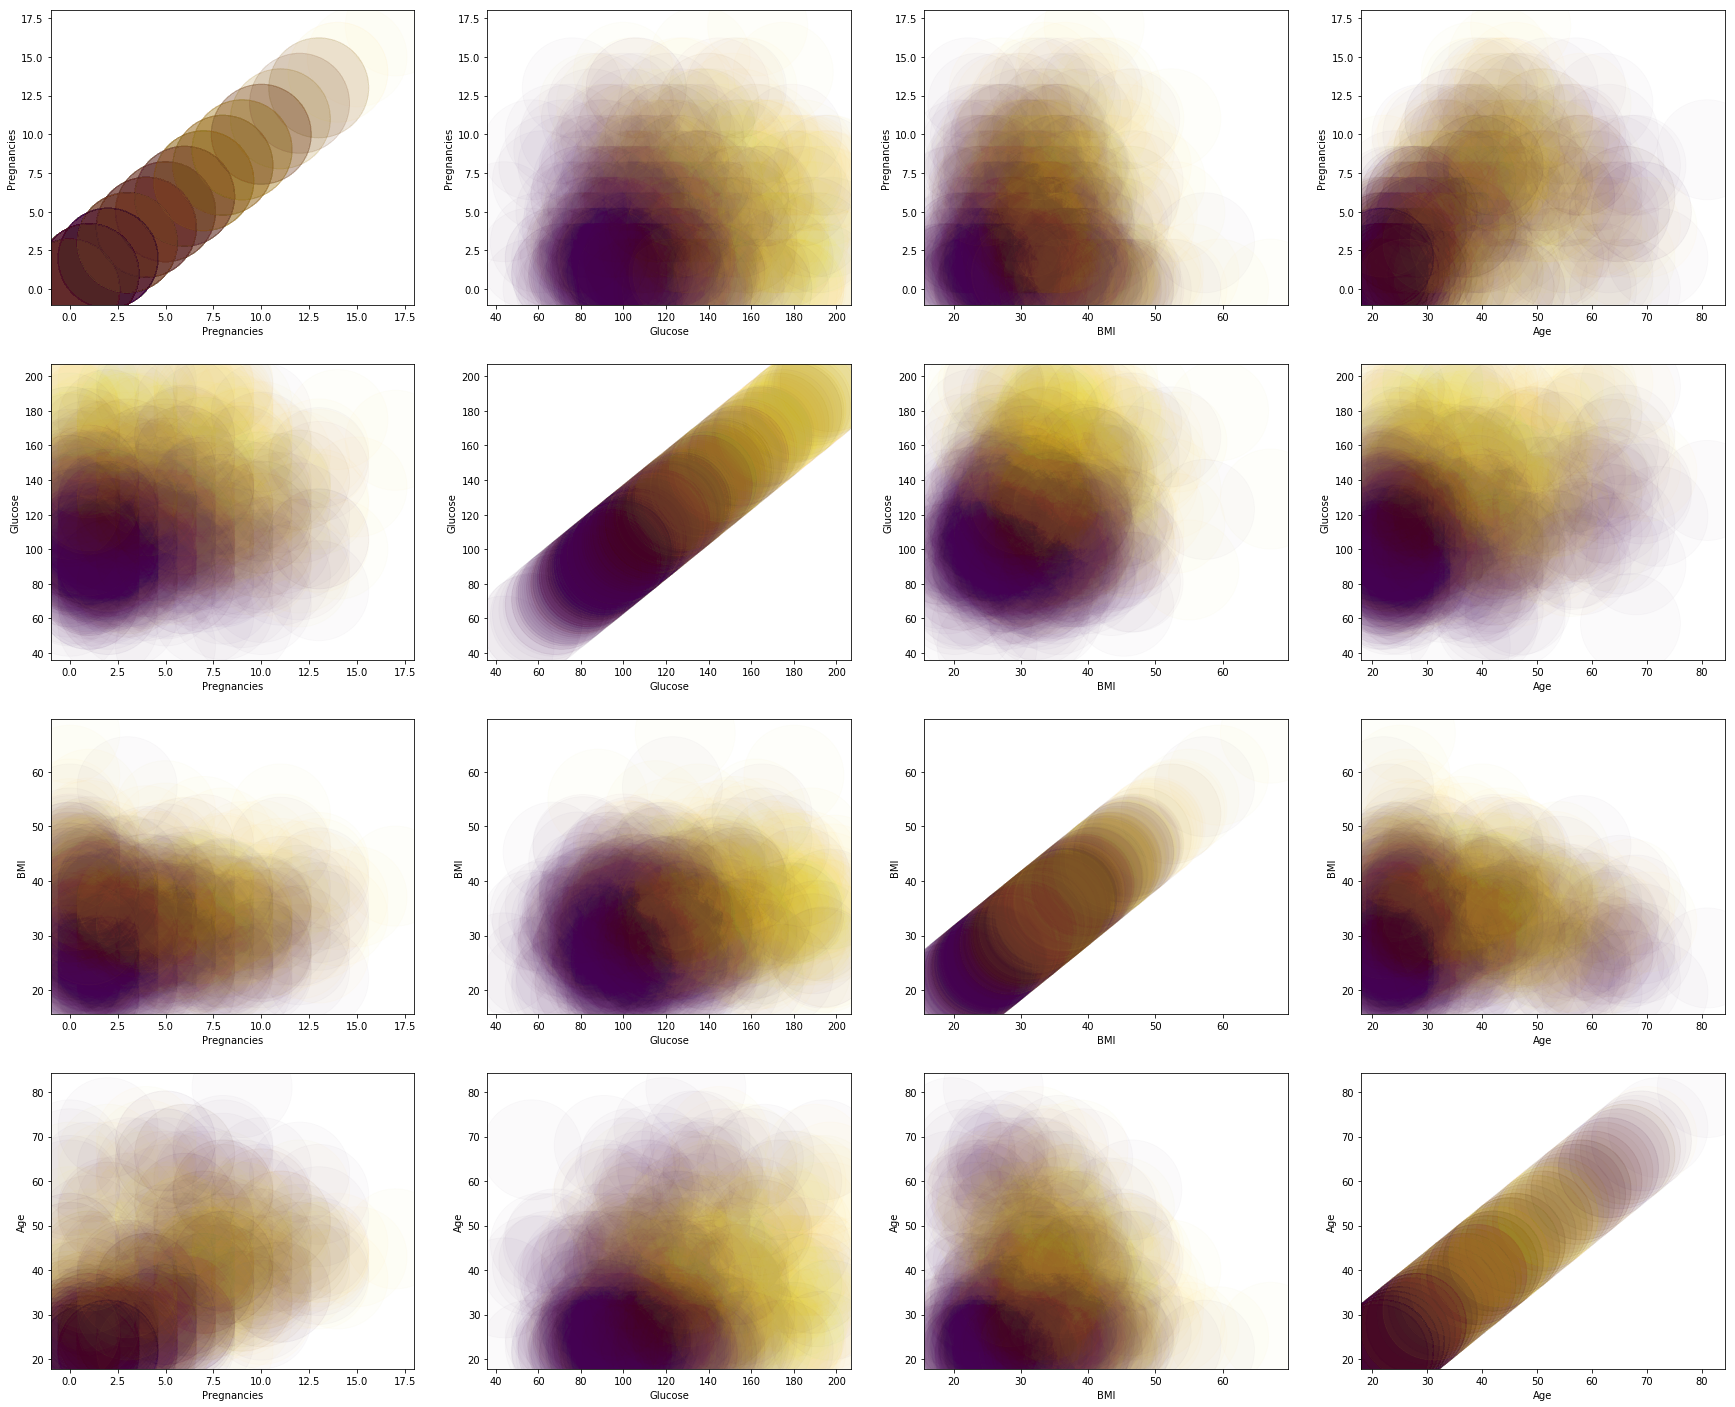

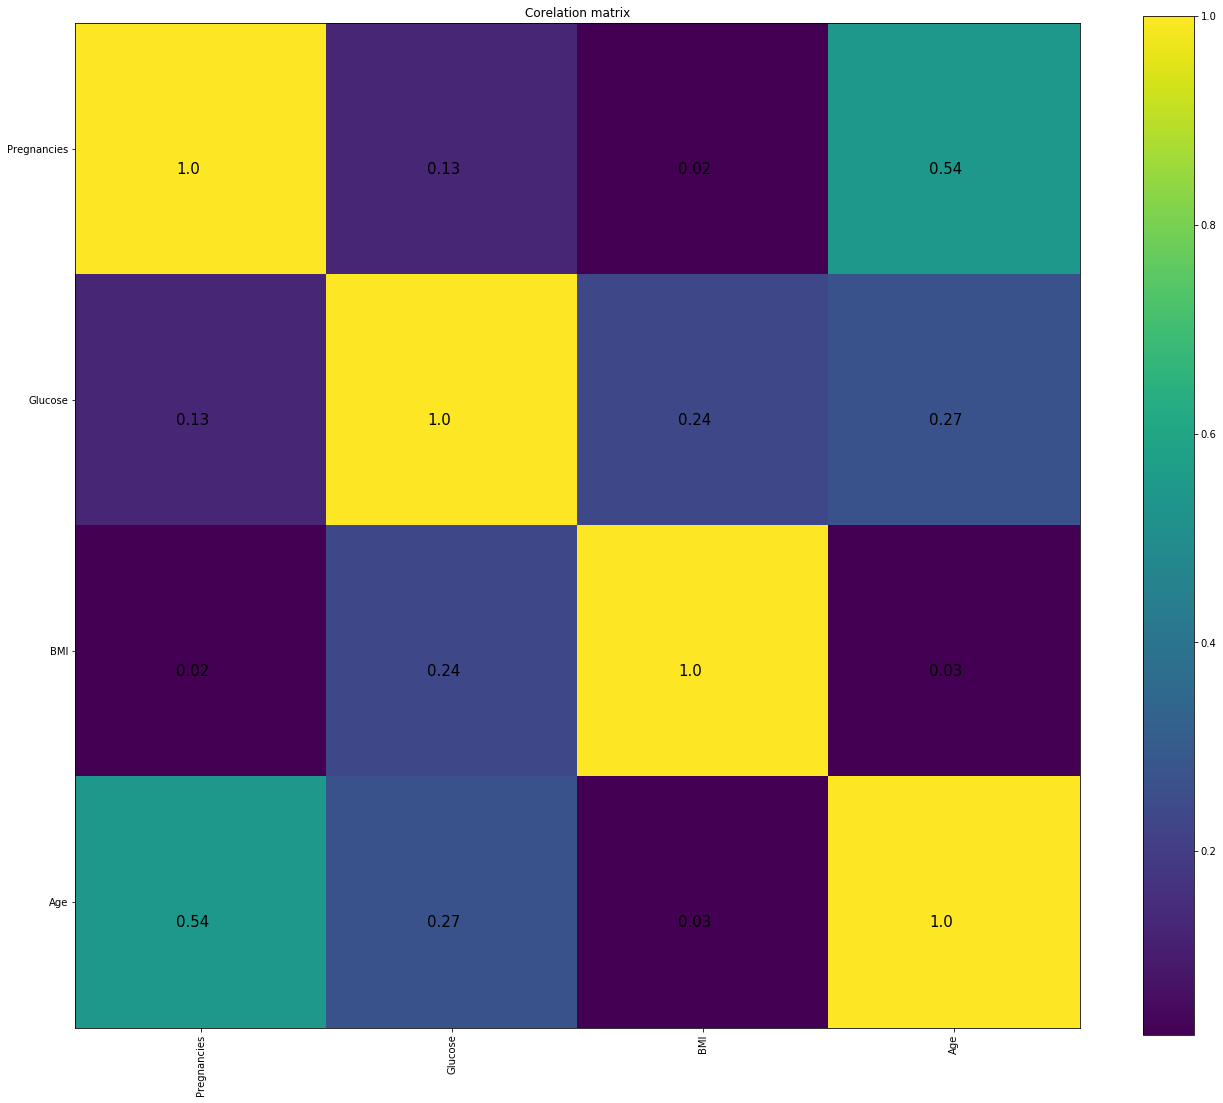

In [96]:
plotBivarAnalysis(data.iloc[:,[0,1,3,5]],data.iloc[:,6],10000,0.02,30,25)

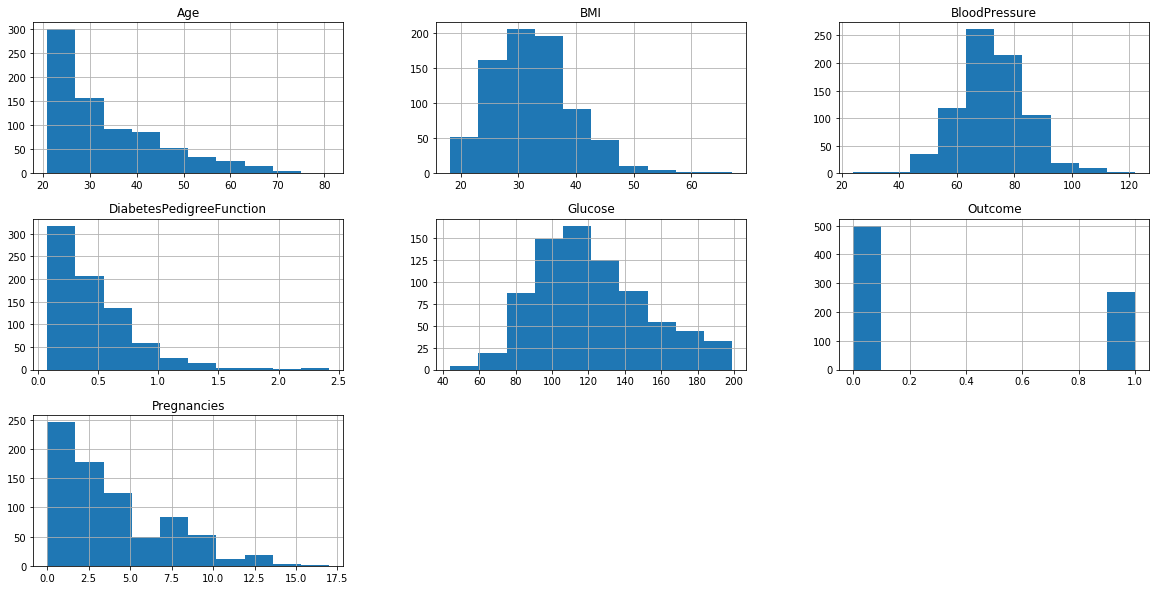

In [133]:
data.hist(figsize=(20,10))
plt.show()

#### On careful EDA I have concluded that Outcomes are most likely differentiable when
    BMI<25 and >45
    glucose<90 and >150
    age 10year gaps
    
    so i will bin data with these margins

In [173]:
bin_marks={
    'Glucose':['<90','90-150','>150'],
    'BMI':['<25','25-45','>45'],
    'Age':['10-20','20-30','30-40','40-50','50-60','>60']
}

In [174]:
data_bin=data.iloc[:,[1,3,5]]

In [175]:
data_bin.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [176]:
l=data_bin.shape[0]
m=1
for col in data_bin.columns:
    for i in range(l):
        if col=='Glucose':
            if data_bin[col][i]<=90:
                j=0
            elif data_bin[col][i]>90 and data_bin[col][i]<150:
                j=1
            else:
                j=2
        elif col=='BMI':
            if data_bin[col][i]<=25:
                j=0
            elif data_bin[col][i]>25 and data_bin[col][i]<45:
                j=1
            else:
                j=2
        else:
            quot=data_bin[col][i]//10
            if quot>6:
                j=5
            else:
                j=quot-1
                
        data_bin[col][i]=bin_marks[col][j]
        
        print(m, end=',')
        m=m+1
        

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

    Samples processed..

In [178]:
data_bin.head()

,Glucose,BMI,Age
0,90-150,25-45,50-60
1,<90,25-45,30-40
2,>150,<25,30-40
3,<90,25-45,20-30
4,90-150,25-45,30-40


In [185]:
data_binned=pd.concat([data,data_bin], axis=1)

In [186]:
data_binned.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose,BMI,Age
0,6,148,72,33.6,0.627,50,1,90-150,25-45,50-60
1,1,85,66,26.6,0.351,31,0,<90,25-45,30-40
2,8,183,64,23.3,0.672,32,1,>150,<25,30-40
3,1,89,66,28.1,0.167,21,0,<90,25-45,20-30
4,0,137,40,43.1,2.288,33,1,90-150,25-45,30-40


In [187]:
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
Glucose                     768 non-null object
BMI                         768 non-null object
Age                         768 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 60.1+ KB


In [188]:
data_binned.to_csv("./Data/binned.csv", index=False)

In [198]:
data_binned.iloc[:,[0,2,4,7,8,9]].head()

,Pregnancies,BloodPressure,DiabetesPedigreeFunction,Glucose,BMI,Age
0,6,72,0.627,90-150,25-45,50-60
1,1,66,0.351,<90,25-45,30-40
2,8,64,0.672,>150,<25,30-40
3,1,66,0.167,<90,25-45,20-30
4,0,40,2.288,90-150,25-45,30-40


In [202]:
pd.get_dummies(data_binned.iloc[:,[0,2,4,7,8,9]]).head()

,Pregnancies,BloodPressure,DiabetesPedigreeFunction,Glucose_90-150,Glucose_<90,Glucose_>150,BMI_25-45,BMI_<25,BMI_>45,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_>60
0,6,72,0.627,1,0,0,1,0,0,0,0,0,1,0
1,1,66,0.351,0,1,0,1,0,0,0,1,0,0,0
2,8,64,0.672,0,0,1,0,1,0,0,1,0,0,0
3,1,66,0.167,0,1,0,1,0,0,1,0,0,0,0
4,0,40,2.288,1,0,0,1,0,0,0,1,0,0,0


In [211]:
simpleClassfier(pd.get_dummies(data_binned.iloc[:,[0,2,4,7,8,9]]),data_binned.iloc[:,6], n=80)

Test Score: 0.65625 
Train Score: 0.6597222222222222


In [215]:
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(pd.get_dummies().values,data_binned.iloc[:,6].values)
rfc.score(pd.get_dummies(data_binned.iloc[:,[0,2,4,7,8,9]]).values,data_binned.iloc[:,6])

0.99609375

In [ ]:
simpleClassfier(pd.get_dummies(data_binned.iloc[:,[0,2,4,7,8,9]]),data_binned.iloc[:,6],[RandomForestClassifier(n_estimators=2),KNeighborsClassifier(n_neighbors=20) ])

In [233]:
Sequential.add?

Signature: Sequential.add(self, layer)
Docstring:
Adds a layer instance on top of the layer stack.

Arguments:
    layer: layer instance.

Raises:
    TypeError: If `layer` is not a layer instance.
    ValueError: In case the `layer` argument does not
        know its input shape.
    ValueError: In case the `layer` argument has
        multiple output tensors, or is already connected
        somewhere else (forbidden in `Sequential` models).
File:      /anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py
Type:      function
